# DataCamp - (Python)

##   Exploratory Data Analysis in Python


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Exploratory Data Analysis in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from empiricaldist import Pmf, Cdf
from scipy.stats import norm
from scipy.stats import linregress
import statsmodels.formula.api as smf


##    CHAPTER 1  - Read, clean, and validate


#### Exercício 1 - DataFrames and Series

In [3]:
#vídeo

Exercício 2

In [4]:
# read the codebook - https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999

Exercício 3

In [5]:
# Exploring the NSFG data

nsfg = pd.read_hdf(data_folder + 'nsfg.hdf5')

# Display the number of rows and columns
print(nsfg.shape, "\n")

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

nsfg.head()

(9358, 10) 

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


#### Exercício 4 - Clean and Validate

In [6]:
#vídeo

Exercício 5

In [7]:
# Validate a variable
# In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

# value	label
# 1	Live birth
# 2	Induced abortion
# 3	Stillbirth
# 4	Miscarriage
# 5	Ectopic pregnancy
# 6	Current pregnancy

# How many pregnancies in this dataset ended with a live birth?
nsfg['outcome'].value_counts()[1]

6489

Exercício 6

In [8]:
# Clean a variable

# the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent 
# refused to answer the question.

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


Exercício 7

In [9]:
# Compute a variable

# For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' 
# the respondent's age at the end of the pregnancy.

# Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's 
# age was 25.75.

# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
preg_length.describe()

#  A variable that's computed from other variables is sometimes called a 'recode'. 

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

#### Exercício 8 - Filter and visualize

In [10]:
#vídeo

Exercício 9

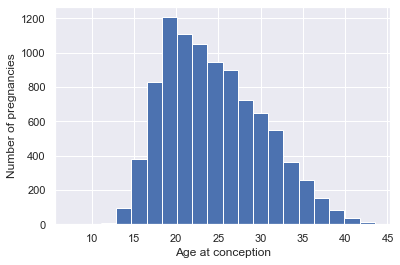

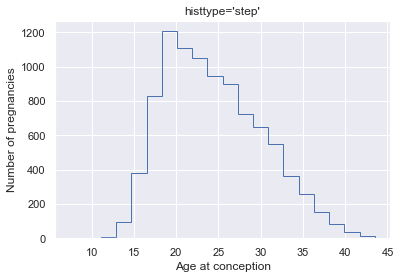

In [11]:
# Make a histogram

# As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each
# pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the 
# video, and also a new parameter - histtype

# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

##########

# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.title("histtype='step'")

# Show the figure
plt.show()

Exercício 10

In [12]:
%%script false
# Compute birth weight

# function 'resample_rows_weighted': takes the NSFG data and resamples it using the sampling weights in wgt2013_2015.
# The result is a sample that is representative of the U.S. population.
# Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, 
# birth_weight.

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16 

##

# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(np.mean(full_term_weight))

Couldn't find program: 'false'


Exercício 11

In [13]:
%%script false
# Filter

# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & (nsfg['nbrnaliv'] != 1)]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Couldn't find program: 'false'


# CHAPTER 2 - Distributions

#### Exercício 1 - Probability mass functions

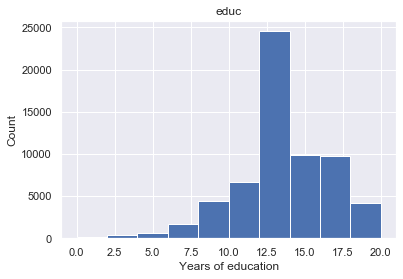

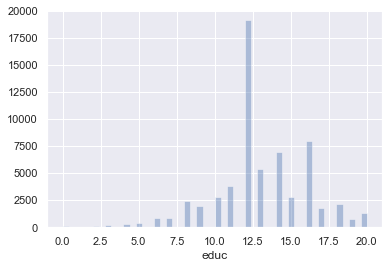

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [14]:
#vídeo

gss = pd.read_hdf(data_folder + "gss.hdf5")

# education histogram
plt.hist(gss['educ'].dropna())
plt.title('educ')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.show()

# a histogram is not the best way to visualize the distribution --> probability mass function

# PMF (probability mass function)
sns.distplot(gss['educ'].dropna(), kde=False)
plt.show()


gss.head()

Exercício 2

In [15]:
# Make a PMF

from empiricaldist import Pmf 

# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result
sorted_pmf = pmf_year.value_counts().sort_index()  # just make value_counts()
print(sorted_pmf)

# How many respondents were interviewed in 2016?
print("\nThere were {} interviewed respondents in 2016.".format(sorted_pmf[2016]))

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64

There were 2867 interviewed respondents in 2016.


Exercício 3

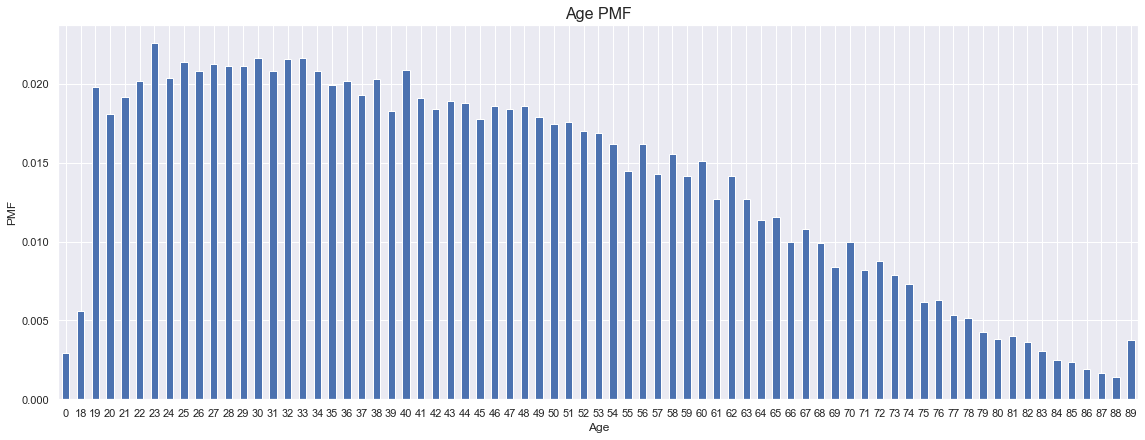

In [16]:
# Plot a PMF

# Select the age column
age = gss['age'].fillna(0).astype(int)

# count
sorted_age = age.value_counts().sort_index()

# Make a PMF of age
pmf_age = sorted_age / sorted_age.sum()

# Plot the PMF
pmf_age.plot(kind='bar')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.xticks(rotation=0)
plt.title('Age PMF', fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.3, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 4 - Cumulative distribution functions (CDF)

In [17]:
np.arange(1, 30) / 30

array([0.03333333, 0.06666667, 0.1       , 0.13333333, 0.16666667,
       0.2       , 0.23333333, 0.26666667, 0.3       , 0.33333333,
       0.36666667, 0.4       , 0.43333333, 0.46666667, 0.5       ,
       0.53333333, 0.56666667, 0.6       , 0.63333333, 0.66666667,
       0.7       , 0.73333333, 0.76666667, 0.8       , 0.83333333,
       0.86666667, 0.9       , 0.93333333, 0.96666667])

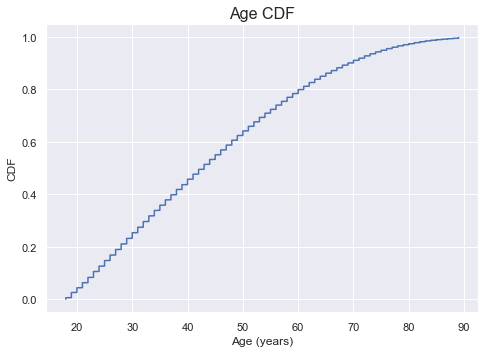

The probability of someone being 30 or younger is 0.2531777286844043
Another way to say this is that age 30 is the 25th percentile of this distribution.

Age 30.0 is on the 25.0th percentile of the population



C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less_equal


In [18]:
#vídeo

# CDF
def ecdf(data):
    """Compute ECDF for a **one-dimensional** array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Compute ECDF
x_age, y_age = ecdf(gss['age'])

# Generate plot
plt.plot(x_age, y_age, linestyle=None)
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.title('Age CDF', fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


# if you give an age, it returns the correspondent probability of someone being that age or younger
print("The probability of someone being {} or younger is {}".format(30, y_age[(x_age <= 30).sum()]))
print("Another way to say this is that age {} is the 25th percentile of this distribution.".format(
       30, round(y_age[(x_age <= 30).sum()], 1)*100))

# You can also get the inverse, where you give the probability and get the age
print("\nAge {} is on the {}th percentile of the population\n".format(
       x_age[(y_age <= 0.25)][-1], 0.25*100))

# we'll use CDF to compare distributions

Exercício 5

In [19]:
# Make a CDF

# make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

example_30 = round(y_age[(x_age <= 30).sum()], 1)

# What fraction of the respondents in the GSS dataset are OLDER than 30?

print("Answer: Approximately {}%".format((1 - example_30)*100))

Answer: Approximately 70.0%


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


Exercício 6

In [20]:
# Compute IQR

# The interquartile range (IQR) is the difference between the 75th and 25th percentiles. 
# It is a measure of variability that is robust in the presence of errors or extreme values.
# In this exercise, you'll compute the interquartile range of *income* in the GSS dataset.
# Income is stored in the 'realinc' column

# Compute ECDF
x_income, y_income = ecdf(gss['realinc'])


In [21]:
# What is the interquartile range (IQR) of income in the GSS datset?

# Calculate the 75th percentile 
percentile_75th = x_income[(y_income < 0.75)][-1]

# Calculate the 25th percentile
percentile_25th = x_income[(y_income < 0.25)][-1]

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

print("\nPercentile 75th: {}".format(percentile_75th))
print("Percentile 25th: {}".format(percentile_25th))

39896.0

Percentile 75th: 55515.0
Percentile 25th: 15619.0


Exercício 7

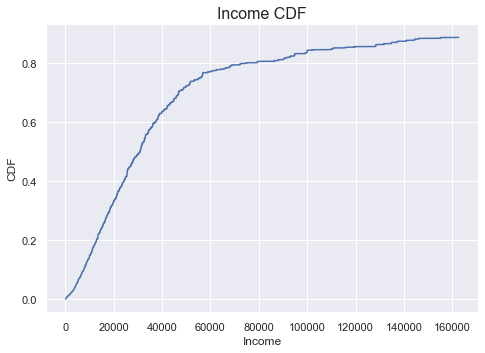

In [22]:
# Plot the CDF

plt.plot(x_income, y_income, linestyle=None)
plt.xlabel('Income')
plt.ylabel('CDF')
plt.title('Income CDF', fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 8 - Comparing distributions

In [23]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


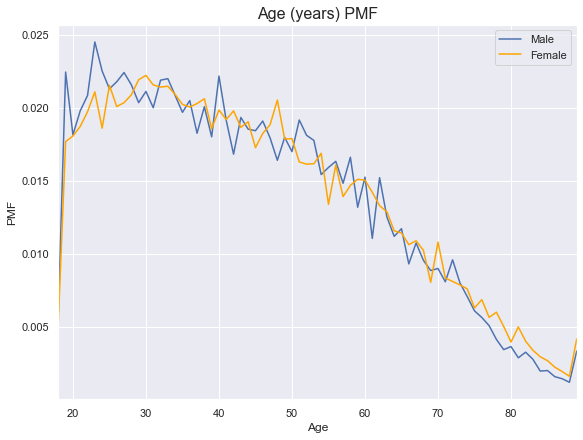

Looks like the differences are somewhat random



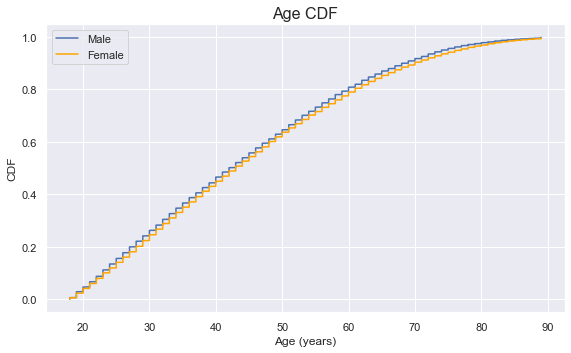

In general CDF's are smoother than PMF's: they can smooth out randomness and we can often get a better view of the 
differences between the distributions. The male blue line is almost always above the orange female line though. It says
that man are younger than women at every percentile. In other words, for every age, the fraction of men below that age is 
higher than the fraction of women below that age - but not by very much.

In general, CDF's are better in terms of distribution comparison.


In [24]:
#vídeo

male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]

# build a PMF for both
m = male_age.value_counts().sort_index()
f = female_age.value_counts().sort_index()

(m / m.sum()).plot(kind='line')
(f / f.sum()).plot(kind='line', color='orange')

plt.xlabel('Age')
plt.ylabel('PMF')
plt.xticks(rotation=0)
plt.title('Age (years) PMF', fontsize=16)
plt.legend(['Male', 'Female'])
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()
print("Looks like the differences are somewhat random\n")

##################################

# multiple CDF's
x_age_male, y_age_male = ecdf(male_age)
x_age_female, y_age_female = ecdf(female_age)

# Generate plot
plt.plot(x_age_male, y_age_male, linestyle=None)
plt.plot(x_age_female, y_age_female, linestyle=None, color='orange')

plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.title('Age CDF', fontsize=16)
plt.legend(['Male', 'Female'])
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

print("""In general CDF's are smoother than PMF's: they can smooth out randomness and we can often get a better view of the 
differences between the distributions. The male blue line is almost always above the orange female line though. It says
that man are younger than women at every percentile. In other words, for every age, the fraction of men below that age is 
higher than the fraction of women below that age - but not by very much.

In general, CDF's are better in terms of distribution comparison.""")

Exercício 9

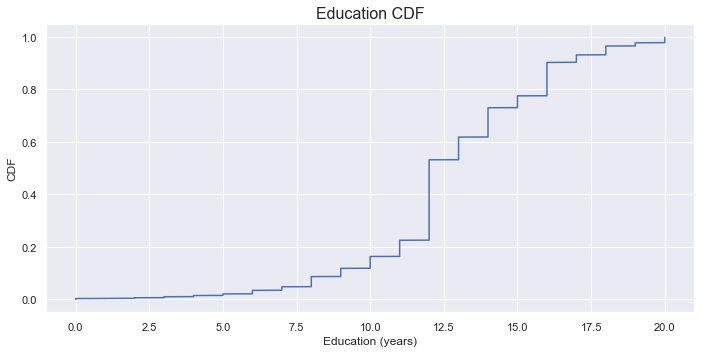

53.1% of respondents report that they have 12 years of education or fewer.


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


In [25]:
# Distribution of education

educ = gss['educ']

# PMF
# (educ.value_counts().sort_index() / educ.value_counts().sort_index().sum()).plot(kind='bar')

# CDF
x_educ, y_educ = ecdf(gss['educ'])

# Generate plot
plt.plot(x_educ, y_educ, linestyle=None)
plt.xlabel('Education (years)')
plt.ylabel('CDF')
plt.title('Education CDF', fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

fraction_12 = y_educ[(x_educ <= 12).sum()]

# What fraction of respondents report that they have 12 years of education or fewer?
print("{}% of respondents report that they have 12 years of education or fewer.".format(round(fraction_12, 3)*100))


Exercício 10

In [26]:
# Extract education levels

# Select educ
educ = gss['educ']

# Postgraduate education
post = educ > 16

# Bachelor's degree
bach = ~post & (educ > 14)

# Associate degree
assc = (educ > 14) & (educ < 16)

# High school (12 or fewer years of education)
high = educ <= 12
print(high.mean())

0.5308807991547402


Exercício 11

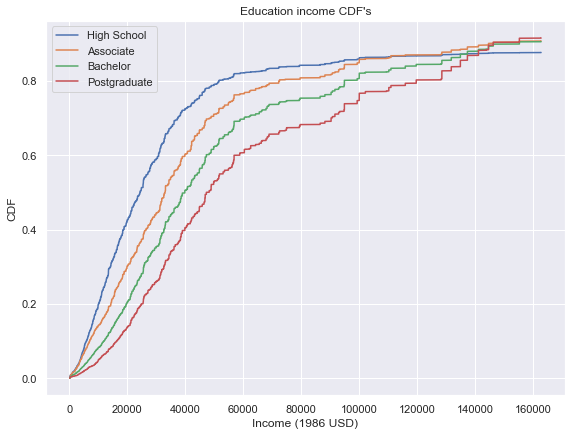

It might not be surprising that people with more education have higher incomes, but looking at these distributions,
we can see where the differences are.


In [27]:
# Plot income CDFs

income = gss['realinc']

# CDF's
x_high, y_high = ecdf(income[high])
x_assc, y_assc = ecdf(income[assc])
x_bach, y_bach = ecdf(income[bach])
x_post, y_post = ecdf(income[post])

# Plot the CDFs
plt.plot(x_high, y_high, linestyle=None, label='High School')
plt.plot(x_assc, y_assc, linestyle=None, label='Associate')
plt.plot(x_bach, y_bach, linestyle=None, label='Bachelor')
plt.plot(x_post, y_post, linestyle=None, label='Postgraduate')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.title("Education income CDF's")
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

print("""It might not be surprising that people with more education have higher incomes, but looking at these distributions,
we can see where the differences are.""")

#### Exercício 12 - Modeling distributions

We have used PMF's and CDF's to plot and compare distributions. We saw that PMF's don't work very well when the
data have a large number of unique values. Now we'll see PDF's (probability density functions) and see how to estimate it
from data.



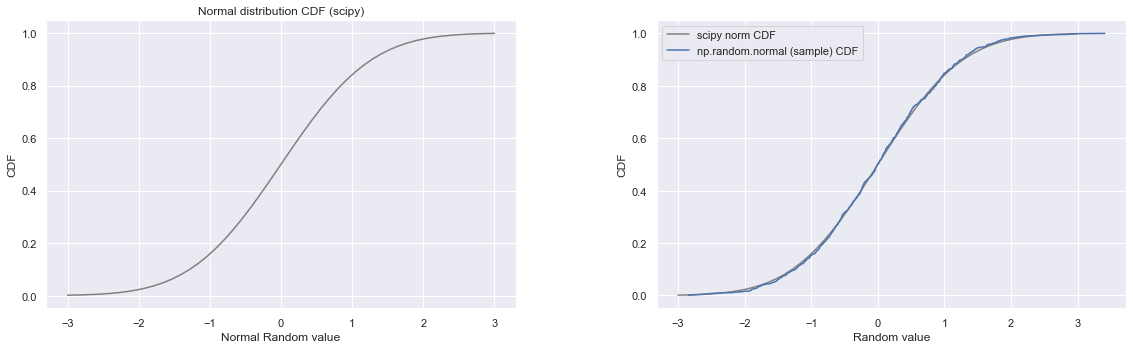

It is close enough - the normal distribution CDF from the CDF from the data (sample_normal) - so if it were real
data, we would conclude that the normal distribution is a good model for the data.


The Bell curve


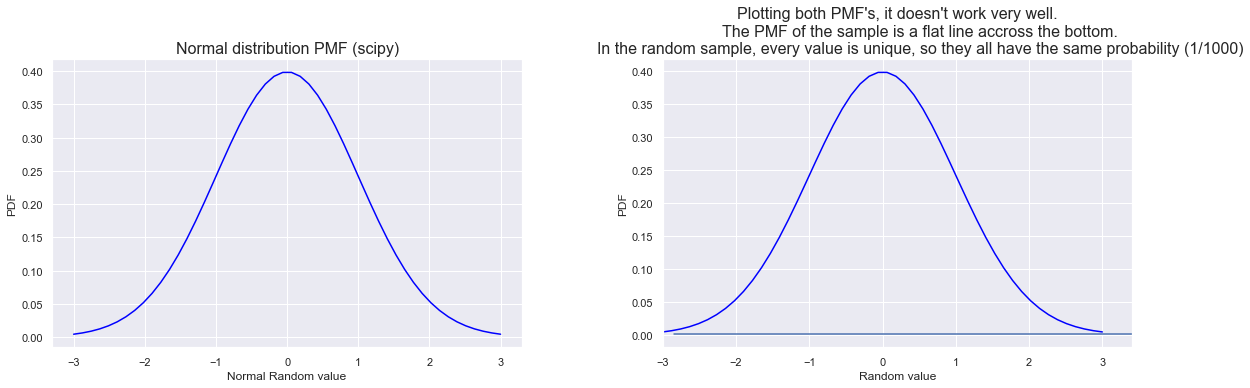

However, we can use the points in the sample to estimate the PDF of the distribution they came from.
This process is called Kernel-density estimation (kde). It's a way of getting from a PMF to a PDF (ver wiki).

KDE plot


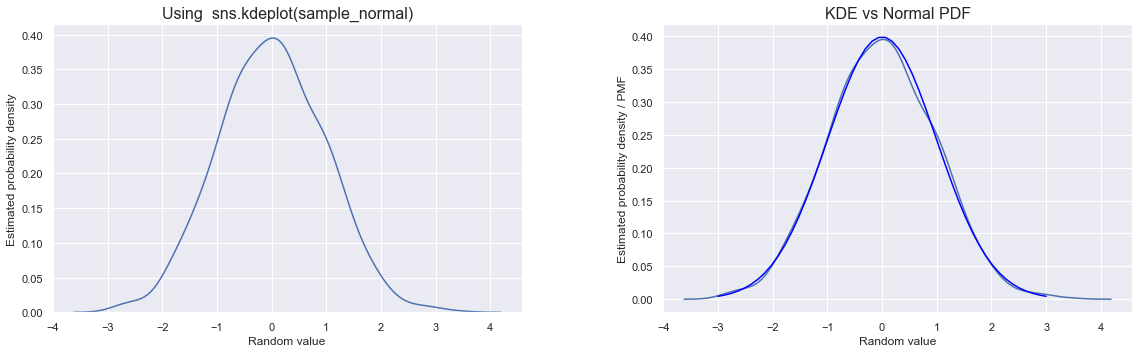

It matches well, although the differences are bigger as when we compared the CDF's.

PMF, CDF, KDE
- Use CDF's for exploration. They are not very well known by some audience, so in that case:
- Use PMF's if there are a small number of unique values.
- Use KDE if there are a lot of values.



In [28]:
#vídeo

print("""We have used PMF's and CDF's to plot and compare distributions. We saw that PMF's don't work very well when the
data have a large number of unique values. Now we'll see PDF's (probability density functions) and see how to estimate it
from data.\n""")

# PDF's

# the Normal distribution

# with scipy
from scipy.stats import norm

print(norm(0, 1)) # normal distribution with mean 0 and standard deviation 1

xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

plt.subplot(1, 2, 1)
plt.plot(xs, ys, color='gray')
plt.xlabel('Normal Random value')
plt.ylabel('CDF')
plt.title('Normal distribution CDF (scipy)')

# sample normal data
sample_normal = np.random.normal(size=1000)
x_normal, y_normal = ecdf(sample_normal)

plt.subplot(1, 2, 2)
plt.plot(xs, ys, color='gray')
plt.plot(x_normal, y_normal)
plt.legend(['scipy norm CDF', 'np.random.normal (sample) CDF'])
plt.xlabel('Random value')
plt.ylabel('CDF')

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

print("""It is close enough - the normal distribution CDF from the CDF from the data (sample_normal) - so if it were real
data, we would conclude that the normal distribution is a good model for the data.\n
=====================================================================================================================
""")

###########

# The Bell curve
print("The Bell curve")
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)

plt.subplot(1, 2, 1)
plt.plot(xs, ys, color='blue')
plt.xlabel('Normal Random value')
plt.ylabel('PDF')
plt.title("Normal distribution PMF (scipy)", fontsize=16)

# PMF from the sample data
sd = pd.Series(sample_normal).value_counts().sort_index()

plt.subplot(1, 2, 2)
plt.plot(xs, ys, color='blue')
(sd / sd.sum()).plot(kind='line')
plt.plot()
plt.xlabel('Random value')
plt.ylabel('PDF')
plt.title("""Plotting both PMF's, it doesn't work very well.
          The PMF of the sample is a flat line accross the bottom.
          In the random sample, every value is unique, so they all have the same probability (1/1000)""", fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

print("However, we can use the points in the sample to estimate the PDF of the distribution they came from.")
print("This process is called Kernel-density estimation (kde). It's a way of getting from a PMF to a PDF (ver wiki).\n")

print("KDE plot")

# KDE plot
plt.subplot(1, 2, 1)
sns.kdeplot(sample_normal)
plt.xlabel('Random value')
plt.ylabel('Estimated probability density')
plt.title('Using  sns.kdeplot(sample_normal)', fontsize=16)

# KDE vs Normal PDF
plt.subplot(1, 2, 2)
sns.kdeplot(sample_normal)
plt.plot(xs, ys, color='blue')
plt.xlabel('Random value')
plt.ylabel('Estimated probability density / PMF')
plt.title('KDE vs Normal PDF', fontsize=16)

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

print("It matches well, although the differences are bigger as when we compared the CDF's.\n")

# to summarize
print("""PMF, CDF, KDE
- Use CDF's for exploration. They are not very well known by some audience, so in that case:
- Use PMF's if there are a small number of unique values.
- Use KDE if there are a lot of values.\n""")


Exercício 13

In [29]:
# Distribution of income

print("""In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the 
incomes fit a normal distribution. We'll see whether that's true for the GSS data.\n """)

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)


In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the 
incomes fit a normal distribution. We'll see whether that's true for the GSS data.
 
4.371148677933652 0.4290082383271419


Exercício 14

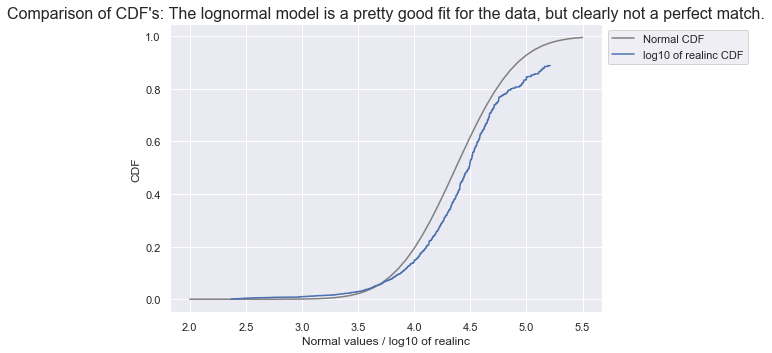

In [30]:
# Comparing CDFs

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the Cdf of log_income
x_income, y_income = ecdf(log_income)
plt.plot(x_income, y_income)
    
# Label the axes
plt.xlabel('Normal values / log10 of realinc')
plt.ylabel('CDF')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.title("Comparison of CDF's: The lognormal model is a pretty good fit for the data, but clearly not a perfect match.",
         fontsize=16)
plt.legend(['Normal CDF', 'log10 of realinc CDF'], bbox_to_anchor=(1, 1))
plt.show()


Exercício 15

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


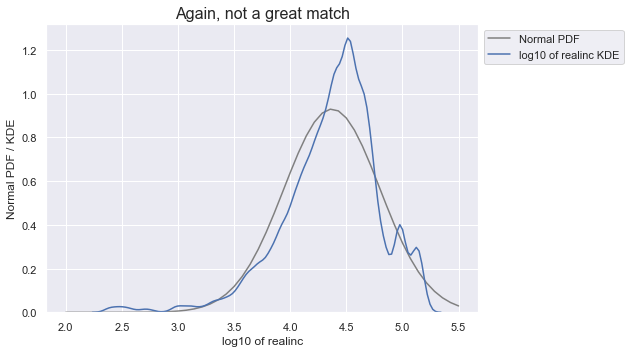

In [31]:
# Comparing PDFs

# We can make the same comparison using a PDF and KDE. 

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('Normal PDF / KDE')
plt.title('Again, not a great match', fontsize=16)
plt.legend(['Normal PDF', 'log10 of realinc KDE'], bbox_to_anchor=(1, 1))

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Chapter 3 - Relationships

#### Exercício 1 - Exploring relationships

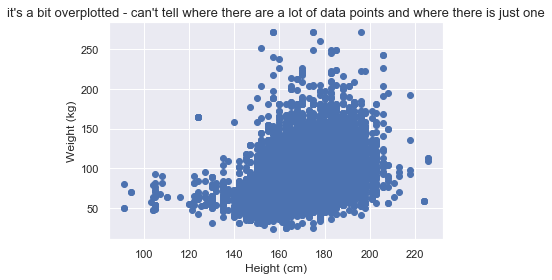

One way to improve this overplotting is to use 'Transparency', using the alpha parameter.
The lower the alpha, the more transparent each data point is: 



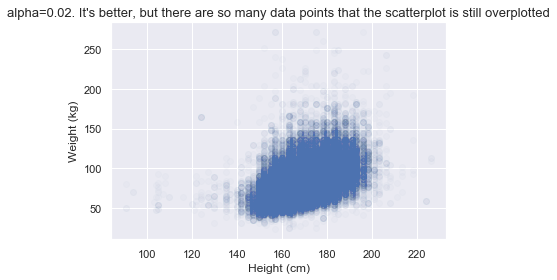

The next step is to make the marker smaller.


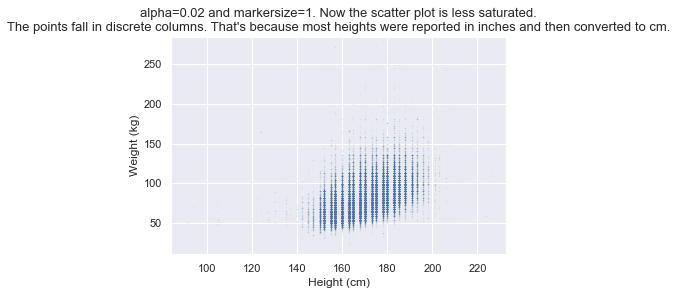

We can break up the columns by adding some random noise to the values. In effect, we are filling in the values
that got rounded off. This is called 'Jittering'.
 


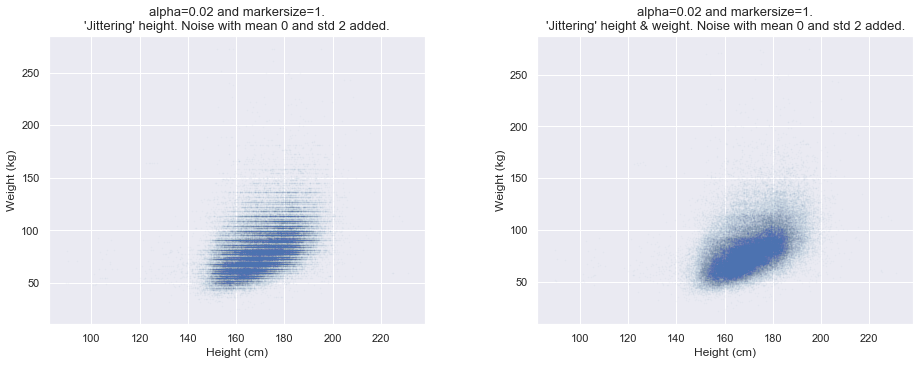

In [32]:
#vídeo

# so far we've only looked at one variable at a time. Now it's time to explore relationships between variables.

# 1st example) Height and Weight (data from BRFSS: behavioral risk factor surveillance system: > 400.000 respondents
#                                 but we'll see a sample of 100.000)

brfss = pd.read_hdf(data_folder + 'brfss.hdf5')

#################################

# Scatter plot
height = brfss['HTM4']   # cm
weight = brfss['WTKG3']  # kg

plt.plot(height, weight, 'o')  # it's faster this way
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title("it's a bit overplotted - can't tell where there are a lot of data points and where there is just one", 
          fontsize=13)
plt.show()

print("""One way to improve this overplotting is to use 'Transparency', using the alpha parameter.
The lower the alpha, the more transparent each data point is: \n""")

# using alpha
plt.plot(height, weight, 'o', alpha=0.02) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title("alpha=0.02. It's better, but there are so many data points that the scatterplot is still overplotted",
          fontsize=13)
plt.show()

print("The next step is to make the marker smaller.")

# Marker size
plt.plot(height, weight, 'o', alpha=0.02, markersize=1) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title("""alpha=0.02 and markersize=1. Now the scatter plot is less saturated.
The points fall in discrete columns. That's because most heights were reported in inches and then converted to cm.""",
          fontsize=13)
plt.show()

print("""We can break up the columns by adding some random noise to the values. In effect, we are filling in the values
that got rounded off. This is called 'Jittering'.\n """)


# Jittering height

height_jitter = height + np.random.normal(0, 2, size=len(brfss))

plt.subplot(1, 2, 1)
plt.plot(height_jitter, weight, 'o', alpha=0.02, markersize=1) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title("""alpha=0.02 and markersize=1.
'Jittering' height. Noise with mean 0 and std 2 added.""", fontsize=13)

# Jittering weight too

weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

plt.subplot(1, 2, 2)
plt.plot(height_jitter, weight_jitter, 'o', alpha=0.02, markersize=1) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title("""alpha=0.02 and markersize=1.
'Jittering' height & weight. Noise with mean 0 and std 2 added.""", fontsize=13)

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.3, hspace=0.3)
plt.show()

Let's now zoom in on the area where most of the points are.


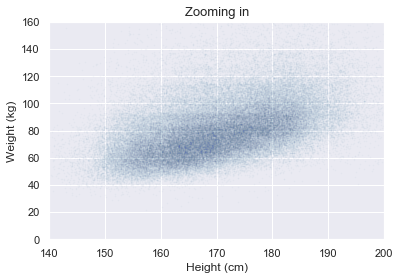

Comparing the plot we started with with this one, they clearly tell 'different stories'. We see that it takes 
some effort to make an effective scatter plot.


In [33]:
print("Let's now zoom in on the area where most of the points are.")

# Zoom  (plt.axis([ ... ]))

plt.plot(height_jitter, weight_jitter, 'o', alpha=0.02, markersize=1) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis([140, 200, 0, 160])
plt.title("""Zooming in""", fontsize=13)
plt.show()

print("""Comparing the plot we started with with this one, they clearly tell 'different stories'. We see that it takes 
some effort to make an effective scatter plot.""")

Exercício 2

In [34]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


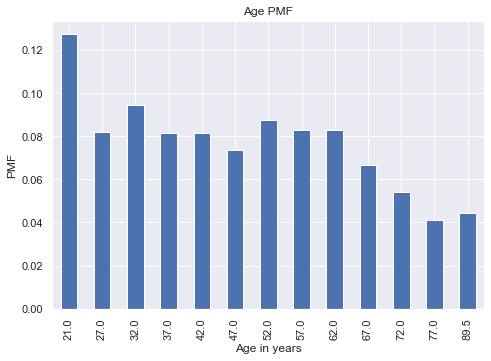

In [35]:
# PMF of age

# Do people tend to gain weight as they get older? 
# before we make a scatter plot, it is a good idea to visualize distributions one variable at a time.

# Extract age
age = brfss['AGE']

# Plot the PMF
age_ = age.value_counts().sort_index()
(age_ / age_.sum()).plot(kind='bar')

# Label the axes
#plt.xticks(np.arange(20, 90, 10))
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.title('Age PMF')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions.

Exercício 3

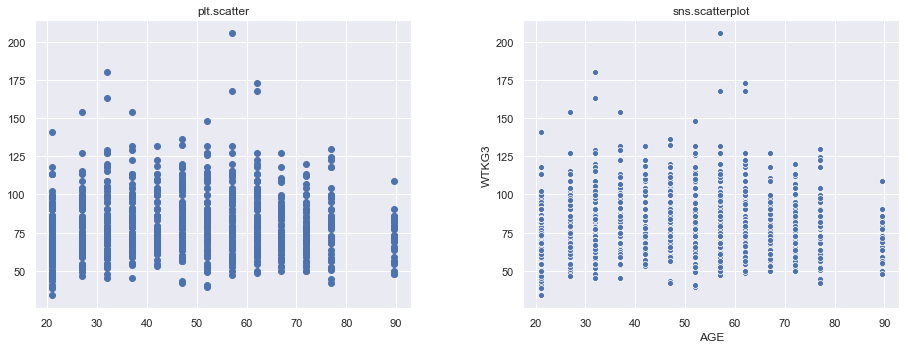

In [36]:
# Scatter plot

# Select the first 1000 respondents - just to make the code faster
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# SIMPLE

# using .scatter
plt.subplot(1, 2, 1)
plt.scatter(age, weight)
plt.title('plt.scatter')

# using seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(age, weight)
plt.title('sns.scatterplot')

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.3, hspace=0)
plt.show()

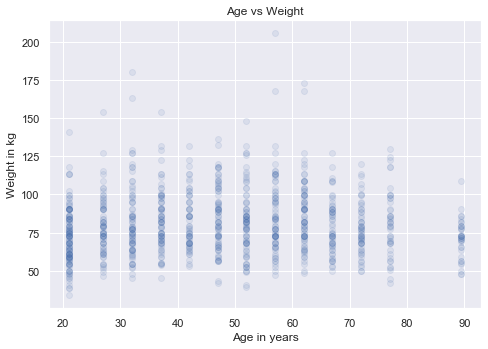

In [37]:
# Make a scatter plot
plt.scatter(age, weight, alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Age vs Weight')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 4

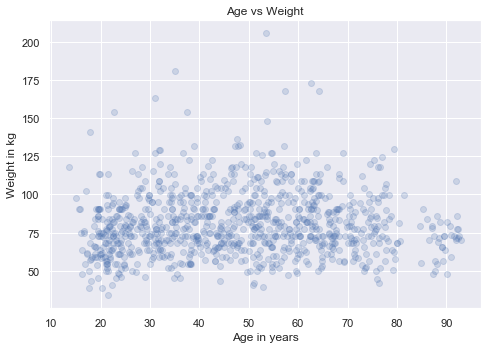

By smoothing out the ages and avoiding saturation, we get the best view of the data. 

But in this case the nature of the relationship is still hard to see. We'll see some other ways to visualize it. 


In [38]:
# Jittering

#Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Age vs Weight')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show() 

print("""By smoothing out the ages and avoiding saturation, we get the best view of the data. 

But in this case the nature of the relationship is still hard to see. We'll see some other ways to visualize it. """)

#### Exercício 5 - Visualizing relationships

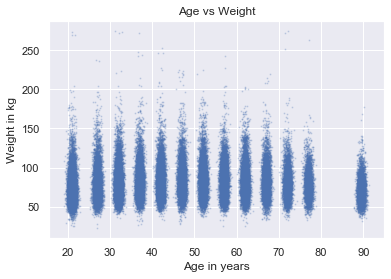

with these settings it is possible to see the shape of the distribution in each age group and the differences
between the groups. Let's now take this one step further and compute the kde for the distribution of each column and 
plot it. There is a name for that: the Violin plot. (first deal with the missing data)


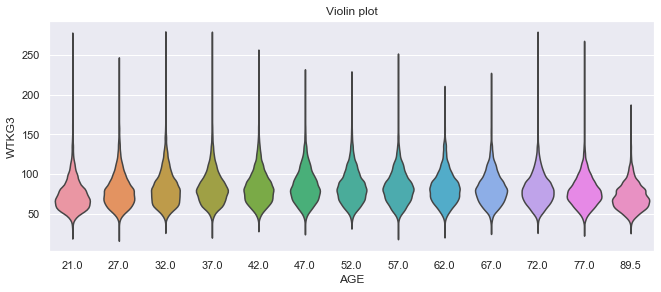

Each column is a graphical representation of the distribution of weight in one age group. Thw width of these 
shapes is proportional to the estimated density. So it's like two vertical PDF's plotted back to back (and just filled 
n with colors).

There's another way to look at data like this: the Box plot


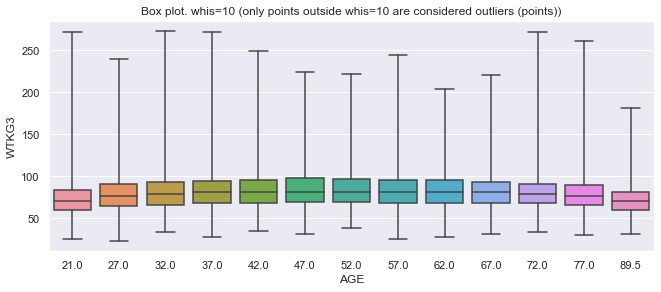

For some, the box plot gives the best view of the relationship between the 2 variables (weight and age).
Looking at the medians, it looks like people at their 40's are the heaviest and younger and older people the less heavier.
Looking at the sizes of the boxes it seems like people at their 40's have the most variability in their weight too.
These plots also show how skewed the distribution of weights is, that is, the heaviest people are much farther from the 
median than the lightest people. 

For data that skewes toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with
plt.yscale('log'):


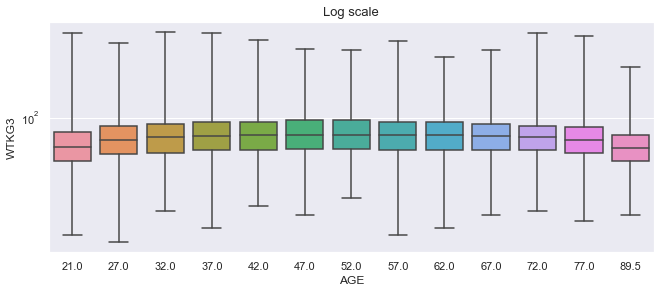

To explore the relationship between age and weight, this is a good figure to see.


In [39]:
#vídeo

# Now with more data
brfss = pd.read_hdf(data_folder + 'brfss.hdf5')

age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', alpha=0.2, markersize=1)  # reduced the markersize because now we have more data
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Age vs Weight')
plt.show() 

print("""with these settings it is possible to see the shape of the distribution in each age group and the differences
between the groups. Let's now take this one step further and compute the kde for the distribution of each column and 
plot it. There is a name for that: the Violin plot. (first deal with the missing data)""")

# Violin plot

# before that we have to deal with the missing data
data = brfss.dropna(subset=['AGE', 'WTKG3'])

sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)  # para já vamos ver com inner=None
plt.title('Violin plot')
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.8, wspace=0, hspace=0)
plt.show()

print("""Each column is a graphical representation of the distribution of weight in one age group. Thw width of these 
shapes is proportional to the estimated density. So it's like two vertical PDF's plotted back to back (and just filled 
n with colors).""")

print("\nThere's another way to look at data like this: the Box plot")

# Box plot
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.title('Box plot. whis=10 (only points outside whis=10 are considered outliers (points))')
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.8, wspace=0, hspace=0)
plt.show()

print("""For some, the box plot gives the best view of the relationship between the 2 variables (weight and age).
Looking at the medians, it looks like people at their 40's are the heaviest and younger and older people the less heavier.
Looking at the sizes of the boxes it seems like people at their 40's have the most variability in their weight too.
These plots also show how skewed the distribution of weights is, that is, the heaviest people are much farther from the 
median than the lightest people. 

For data that skewes toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with
plt.yscale('log'):""")

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.title('Log scale', fontsize=13)
plt.yscale('log')
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.8, wspace=0, hspace=0)
plt.show()

print("To explore the relationship between age and weight, this is a good figure to see.")


Exercício 6

brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.


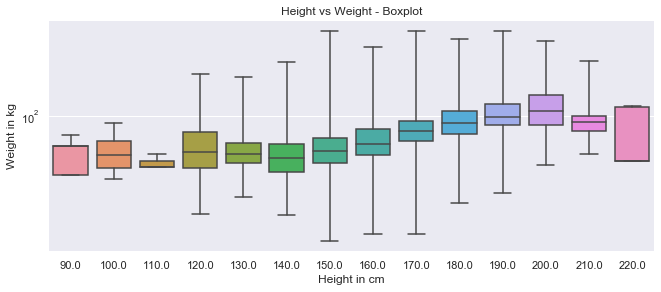

In [40]:
# Height and weight

print("brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.")

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Height vs Weight - Boxplot')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.8, wspace=0, hspace=0)
plt.show()

Exercício 7

In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8
income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the 
distribution by computing the PMF. 


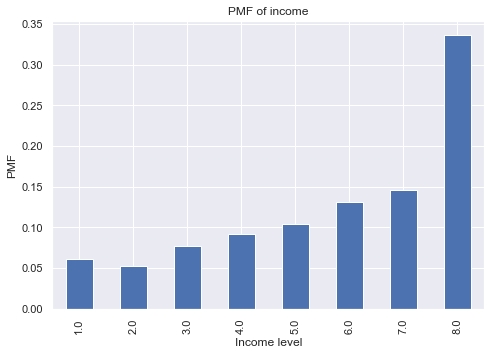

In [41]:
# Distribution of income

print("""In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8
income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the 
distribution by computing the PMF. """)

# Extract income
income = brfss['INCOME2']

# Plot the PMF
inc = income.value_counts().sort_index()
(inc / inc.sum()).plot(kind='bar')

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.title('PMF of income')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 8

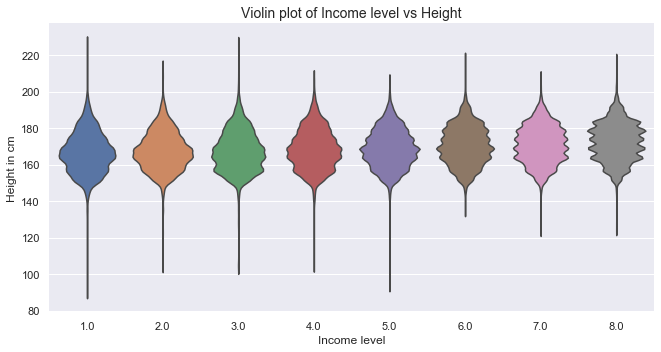

It looks like there is a weak positive relationship between income and height, at least for incomes below 
the median.


In [42]:
# Income and height

# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.title('Violin plot of Income level vs Height', fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1, wspace=0, hspace=0)
plt.show()

print("""It looks like there is a weak positive relationship between income and height, at least for incomes below 
the median.""")

#### Exercício 9 - Correlation

Correlation matrix:
           HTM4     WTKG3       AGE
HTM4   1.000000  0.474203 -0.093684
WTKG3  0.474203  1.000000  0.021641
AGE   -0.093684  0.021641  1.000000

It is tempting to conclude, for example, that there is no relationship between AGE and WEIGHT (corr 0.02). But
we have already seen that there is. So why is the correlation so low? We've seen that people in their 40's are the heaviest,
younger and older people are lighter, so this is a non-linear relationship, but correlation only works with linear 
relationships. If the relationship is non-linear, correlation generally underestimates how strong it is. 

To demonstrate, let's generate some fake data:


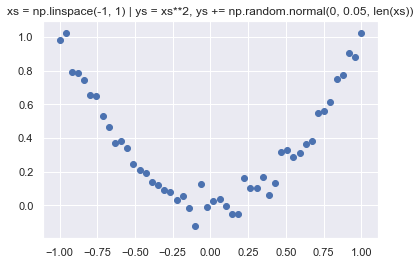

It's clear that this is a clear relationship. However, the correlation between these 2 variables is:
[[ 1.         -0.01502589]
 [-0.01502589  1.        ]]

In general, if the correlation is high, we can conclude that there is a strong linear relationship, but if the
correlation is close to 0 that doesn't mean that there is no relationship. There might even be a strong non-linear 
relationship. This is one of the reasons I think correlations are not such a great statistic.

Be careful with the word itself. Correlation says nothing about slope. If we say 2 variables are correlated, that only means
we can use one to predict the other, but that might eventually not be what we care about. 
For example, suppose we are concerned about the health effects of weight gain, so we plot weight vs age from 20 to 50 years
old. Here are 2 fake datasets.


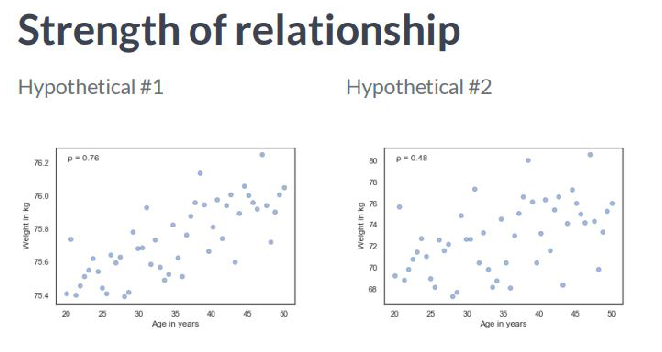

The one on the left has higher correlation, about 0.76 (compared to 0.48). On the left, the average weight gain
over 30 years is less than 1 kg, while on the right is almost 10 kg! (see y axis values). In this scenario the relationship
on the right is more important even though the correlation is lower. The statistic we really care about hereis the slope of
the line.


In [43]:
#vídeo

columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

print("Correlation matrix:")
print(subset.corr())

print("""\nIt is tempting to conclude, for example, that there is no relationship between AGE and WEIGHT (corr 0.02). But
we have already seen that there is. So why is the correlation so low? We've seen that people in their 40's are the heaviest,
younger and older people are lighter, so this is a non-linear relationship, but correlation only works with linear 
relationships. If the relationship is non-linear, correlation generally underestimates how strong it is. """)

print("\nTo demonstrate, let's generate some fake data:")

xs = np.linspace(-1, 1)
ys = xs**2 
ys += np.random.normal(0, 0.05, len(xs))

plt.scatter(xs, ys)
plt.title('xs = np.linspace(-1, 1) | ys = xs**2, ys += np.random.normal(0, 0.05, len(xs))')
plt.show()

print("""It's clear that this is a clear relationship. However, the correlation between these 2 variables is:
{}""".format(np.corrcoef(xs, ys)))

print("""\nIn general, if the correlation is high, we can conclude that there is a strong linear relationship, but if the
correlation is close to 0 that doesn't mean that there is no relationship. There might even be a strong non-linear 
relationship. This is one of the reasons I think correlations are not such a great statistic.

Be careful with the word itself. Correlation says nothing about slope. If we say 2 variables are correlated, that only means
we can use one to predict the other, but that might eventually not be what we care about. 
For example, suppose we are concerned about the health effects of weight gain, so we plot weight vs age from 20 to 50 years
old. Here are 2 fake datasets.""")

image = plt.imread(data_folder + "corr.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

print("""The one on the left has higher correlation, about 0.76 (compared to 0.48). On the left, the average weight gain
over 30 years is less than 1 kg, while on the right is almost 10 kg! (see y axis values). In this scenario the relationship
on the right is more important even though the correlation is lower. The statistic we really care about hereis the slope of
the line.""")

Exercício 10

In [44]:
# Computing correlations

# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


Exercício 11

Interpreting correlations

In the previous exercise, the correlation between income and vegetable consumption is about 0.12. 
The correlation between age and vegetable consumption is about -0.01.

Which of the following are **correct** interpretations of these results:

- A: People with higher incomes eat more vegetables.
- B: The relationship between income and vegetable consumption is linear.
- C: Older people eat more vegetables.
- D: There could be a strong nonlinear relationship between age and vegetable consumption.

In [45]:
print("A and D only")

A and D only


#### Exercício 12 - Simple Regression

LinregressResult(slope=0.8885255955520344, intercept=-69.91026324872728, rvalue=0.46425587750525316, pvalue=0.0, stderr=0.0055948727684791266) 



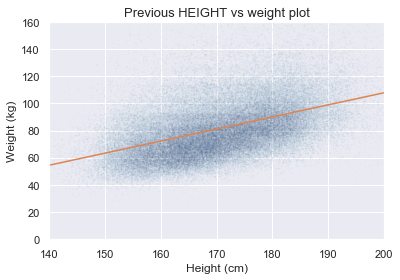

The slope of this line seems consistent with the scatter plot.


Linear Regression has the same problem as correlation. It only measures the strength of a linear relationship.
For example, if you look at the scatter plot between AGE and weight you see the relationship is non-linear. If you don't
look at the scatter plot, and blindly compute the regression line, here is what you get:

LinregressResult(slope=0.02398115956696869, intercept=80.07977583683224, rvalue=0.021641432889064036, pvalue=4.374327493007821e-11, stderr=0.003638139410742186)


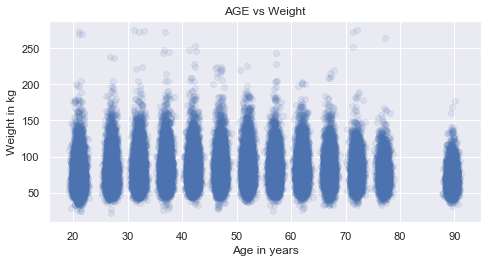

You have a slope of 0.02 when the scatter plot shows the non-linear relationship between these 2 variables - 
people in their 40's are heavier, younger and older people lighter.

After this we'll see how to capture non-linear relationships.


In [46]:
#vídeo

from scipy.stats import linregress

# Hypothetical 1

# Hypothetical 2
# - ver vídeo - although lower correlation it has a higher slope, which is what interests us

# Regression lines

#########

plt.plot(height_jitter, weight_jitter, 'o', alpha=0.02, markersize=1) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis([140, 200, 0, 160])
plt.title("Previous HEIGHT vs weight plot", fontsize=13)

brfss_2 = brfss.copy()
brfss_2['height_jitter'] = height_jitter
brfss_2['weight_jitter'] = weight_jitter
brfss_2 = brfss_2[['height_jitter', 'weight_jitter']].dropna()
xs =  brfss_2['height_jitter']
ys =  brfss_2['weight_jitter']
res = linregress(xs, ys)
print(res, "\n")
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx
plt.plot(fx, fy, '-')
plt.show()

print("The slope of this line seems consistent with the scatter plot.")

print("\n=============================================================================================================\n")
print("""Linear Regression has the same problem as correlation. It only measures the strength of a linear relationship.
For example, if you look at the scatter plot between AGE and weight you see the relationship is non-linear. If you don't
look at the scatter plot, and blindly compute the regression line, here is what you get:\n""")

subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

# scatter plot
plt.scatter(age, weight, alpha=0.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('AGE vs Weight')
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.7, wspace=0, hspace=0)
plt.show()

print("""You have a slope of 0.02 when the scatter plot shows the non-linear relationship between these 2 variables - 
people in their 40's are heavier, younger and older people lighter.

After this we'll see how to capture non-linear relationships.""")

Exercício 13

In [47]:
# Income and vegetables

from scipy.stats import linregress

# Extract the variables
subset = brfss[:2500].dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)
print("""The estimated slope tells the increase in vegetable servings from one income group to the next.""")

LinregressResult(slope=0.07218459777578104, intercept=1.5062807170296901, rvalue=0.12385824754403107, pvalue=6.040548091462636e-08, stderr=0.013270891076264212)
The estimated slope tells the increase in vegetable servings from one income group to the next.


Exercício 14

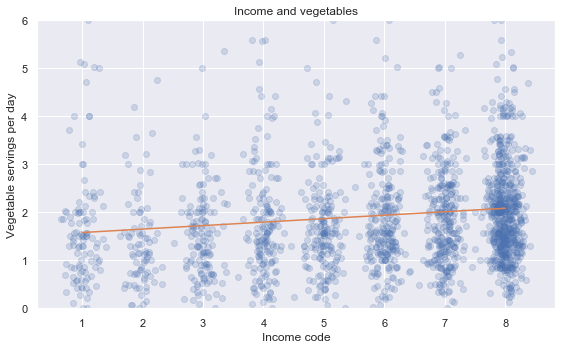

In [48]:
# Fit a line

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx
plt.plot(fx, fy, '-', alpha=1)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.title('Income and vegetables')
plt.ylim([0, 6])
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

# Chapter 4 - Multivariate Thinking

#### Exercício 1 - Limits of simple Regression

Limits of simple regression

1) Regression is not symmetric


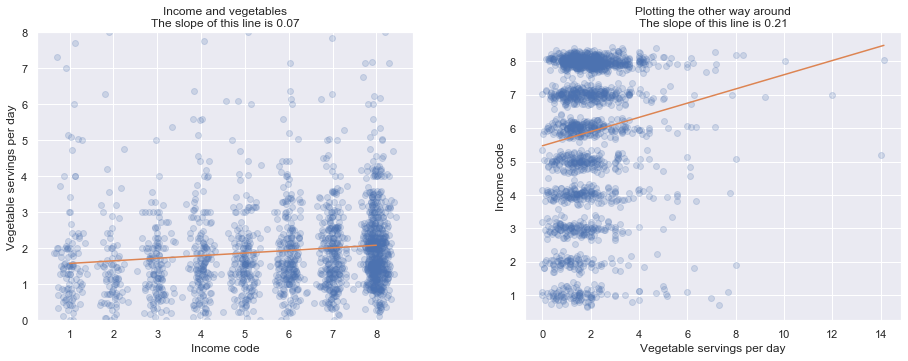

If we use vegetable consumption to predict income, we see a difference, but when we use income to predict 
vegetable consumption, we see a small difference. This shoes that regression is not symmetric.

2) This example serves to make another point: Regression is not causation. 

If you think people with lower income can't afford vegetables you can look at the figure on the left and conclude that 
doesn't make much difference. If you think better diet increases income, the figure on the right might make you think it
does, but in general, regression can't tell you what causes what. In this example, a may cause b or b may cause a, or there
can be even other factors that cause a and b. Regression alone can't tell you which way it goes.

 
However we have tools for teasing apart relationships among multiple variables. One of the most important is
multiple regression. scipy doesn't do multiple regression, so we need to use statsmodels: (or sklearn). 

Income as a function of vegetable consum

In [49]:
#vídeo

print("""Limits of simple regression
======================================================================================================""")

# Regression is not symmetric
print("\n1) Regression is not symmetric")

# Income and vegetables
plt.subplot(1, 2, 1)
plt.plot(x_jitter, ys, 'o', alpha=0.2)
plt.plot(fx, fy, '-', alpha=1)
plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.title("""Income and vegetables
The slope of this line is {}""".format(round(res.slope, 2)))
plt.ylim([0, 8])

plt.subplot(1, 2, 2) 
plt.plot(ys, x_jitter, 'o', alpha=0.2)
res2 = linregress(ys, xs)
fx2 = np.array([ys.min(), ys.max()])
fy2 = res2.intercept + res2.slope*fx2
plt.plot(fx2, fy2, '-', alpha=1)
plt.xlabel('Vegetable servings per day')
plt.ylabel('Income code')
plt.title("""Plotting the other way around
The slope of this line is {}""".format(round(res2.slope, 2)))
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.3, hspace=0)
plt.show()

print("""If we use vegetable consumption to predict income, we see a difference, but when we use income to predict 
vegetable consumption, we see a small difference. This shoes that regression is not symmetric.\n""")

# Regression is not causation
print("""2) This example serves to make another point: Regression is not causation. 

If you think people with lower income can't afford vegetables you can look at the figure on the left and conclude that 
doesn't make much difference. If you think better diet increases income, the figure on the right might make you think it
does, but in general, regression can't tell you what causes what. In this example, a may cause b or b may cause a, or there
can be even other factors that cause a and b. Regression alone can't tell you which way it goes.
\n====================================================================================================\n """)

print("""However we have tools for teasing apart relationships among multiple variables. One of the most important is
multiple regression. scipy doesn't do multiple regression, so we need to use statsmodels: (or sklearn). 

Income as a function of vegetable consumption: (one variable as well for now)""")

# Multiple regression
import statsmodels.formula.api as smf

results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit() # ols: Ordinary Least Squares == regression
print(results.params)


Exercício 2

Regression and causation

In the BRFSS dataset, there is a strong relationship between vegetable consumption and income. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

Which of the following conclusions can we draw from this data?

 - A. Eating a good diet leads to better health and higher income.
 - B. People with higher income can afford a better diet.
 - C. People with high income are more likely to be vegetarians.

In [50]:
print("""None of them. This data is consistent with all of these conclusions, but it does not provide conclusive evidence 
for any of them.""")

None of them. This data is consistent with all of these conclusions, but it does not provide conclusive evidence 
for any of them.


Exercício 3

In [51]:
# Using StatsModels

from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res, "\n")

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092104998, intercept=1.5287786243363117, rvalue=0.11967005884864078, pvalue=1.378503916251223e-238, stderr=0.002110976356332331) 

Intercept    1.528779
INCOME2      0.069880
dtype: float64


#### Exercício 4 - Multiple Regression

Predicting real income ~ education
Intercept   -11539.147837
educ          3586.523659
dtype: float64 

Each additional year of education is associated with an increase of 3586 USD of income.


Predicting real income ~ education + age
Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

Now the estimated slope for education is 3655, a little more than in the previous model. 
The estimated slope for age is only about 80 USD per year, which is surprisingly small.
To see what's going on here, let's see more closely at the relationship between age and income.



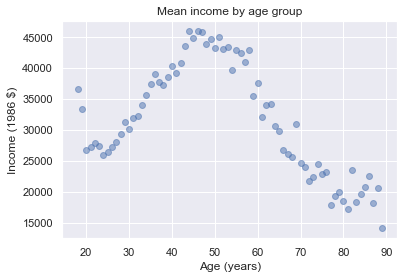

The estimated slope is small because the relationship is non-linear.
Remember, correlation and simple regression can't measure non-linear relationships, but multiple regression can.
To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other 
variables. As an example, let's create a variable called age2, which is equal to age squared. 

Adding a quadratic term: Predicting real income ~ education + age + age**2
Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

Now, the slope associated with age is substantial: about 1700 USD per year. The slope associated with age2 is
negative, -17 (harder to interpret). In any case, next we'll see methods to visualize regression results. 


In [52]:
#vídeo

print("Predicting real income ~ education")
# Income and education
gss = pd.read_hdf(data_folder + 'gss.hdf5', 'gss')
results = smf.ols('realinc ~ educ', data=gss).fit()
print(results.params, "\n")
print("Each additional year of education is associated with an increase of 3586 USD of income.")
print("\n======================================================================================================\n")

# Adding age
print("Predicting real income ~ education + age")
results = smf.ols('realinc ~ educ + age', data=gss).fit()
print(results.params)
print("""\nNow the estimated slope for education is 3655, a little more than in the previous model. 
The estimated slope for age is only about 80 USD per year, which is surprisingly small.
To see what's going on here, let's see more closely at the relationship between age and income.
""")

# Income and age
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.title('Mean income by age group')
plt.show()

print("""The estimated slope is small because the relationship is non-linear.
Remember, correlation and simple regression can't measure non-linear relationships, but multiple regression can.
To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other 
variables. As an example, let's create a variable called age2, which is equal to age squared. """)

# Adding a quadratic term
print("\nAdding a quadratic term: Predicting real income ~ education + age + age**2")
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
print(results.params)

print("""\nNow, the slope associated with age is substantial: about 1700 USD per year. The slope associated with age2 is
negative, -17 (harder to interpret). In any case, next we'll see methods to visualize regression results. """)

Exercício 5

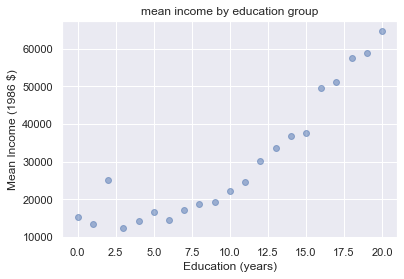

It looks like the relationship between income and education is non-linear.


In [53]:
# Plot income and education

# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Mean Income (1986 $)')
plt.title('mean income by education group')
plt.show()
print("It looks like the relationship between income and education is non-linear.")

Exercício 6

In [54]:
# Non-linear model of education

import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)
print("The slope associated with educ2 is positive, so the model curves upward.")

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64
The slope associated with educ2 is positive, so the model curves upward.


#### Exercício 7 - Visualizing regression results

Previous model: realinc ~ educ + educ2 + age + age2
Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64
The parameters are hard to interpret. Fortunately, we don't have to - sometimes the best way to understand the 
model is by looking at its predictions rather than its parameters. 

Using results.predict(df) - it takes a dataframe as a parameter and turns a series with a prediction for each row in the
dataframe. Defining a df we predict the average income for each age group where we keep the education values constant
(=12 for example, a common value: the High School value). 


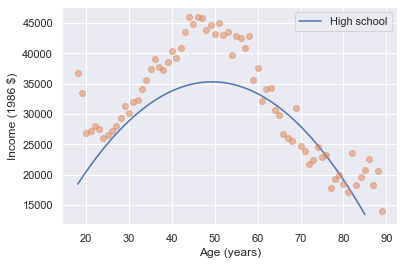

We can then do the same with different levels of education, like 14 years (Associate) and 16 years (Bachelor):


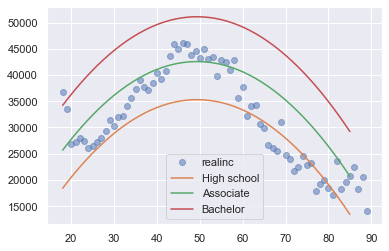

This visualization helps validate the model since we compare the predictions with the data. And it also help us
interpret the model since we can see the separate constributions of age and education. 


In [55]:
#vídeo

# Modeling income and age - model from the previous exercise
print("Previous model: realinc ~ educ + educ2 + age + age2")
print(results.params)
print("""The parameters are hard to interpret. Fortunately, we don't have to - sometimes the best way to understand the 
model is by looking at its predictions rather than its parameters. 

Using results.predict(df) - it takes a dataframe as a parameter and turns a series with a prediction for each row in the
dataframe. Defining a df we predict the average income for each age group where we keep the education values constant
(=12 for example, a common value: the High School value). """)

# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2

pred12 = results.predict(df)

# Plotting predictions
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

print("""We can then do the same with different levels of education, like 14 years (Associate) and 16 years (Bachelor):""")

# Levels of education
plt.plot(mean_income_by_age, 'o', alpha=0.5, label='realinc')
plt.plot(df['age'], pred12, label='High school')

df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.legend()
plt.show()

print("""This visualization helps validate the model since we compare the predictions with the data. And it also help us
interpret the model since we can see the separate constributions of age and education. """)

Exercício 8

In [56]:
# Making predictions

# At this point, we have a model that predicts income using age, education, and sex.
# Let's see what it predicts for different levels of education, holding age constant.

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate the predictions
pred = results.predict(df)
pred.head()

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64

Exercício 9

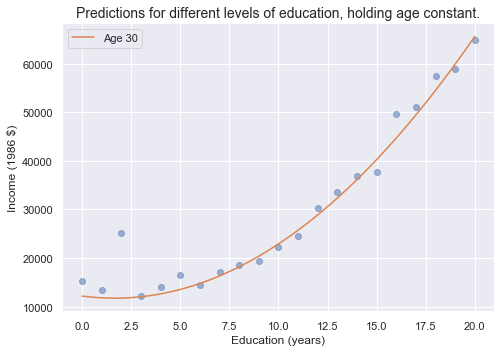

In [57]:
# Visualizing predictions

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.title('Predictions for different levels of education, holding age constant.', fontsize=14)
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 10 - Logistic Regression

In [58]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2,educ2
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,676.0,324.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0,144.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0,144.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0,196.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,3481.0,144.0


To understand Logistic Regression, we have to start with categorical variables - we need to 
include C(categorical variable) - for categorical - in the stats model. Here are the results (regression):
 
Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64
The regression treats the value sex=1 (male) as the default and reports the difference associated with the value
sex=2 (female). This means here that income for women is about 4100 USD less than for men after controlling for age and 
education. This categorical value has only 2 values - the Boolean variable.

For example, one of the questions in the general social survey (gss) asks 'Would you favor or oppose a law which would 
require a person to obtain a police permit before he or she could buy a gun?'.

The variable is called gunlaw - 1 means yes, 0 no.
1.0    30918
0.0     9632
Name: gunlaw, dtype: int64


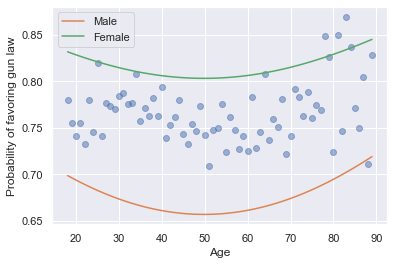

According to the model, people with age near 50 are least likely to support gun control, at least as this question
was posed, and women are more likely to support it than man by almost 15 percentage points. 
Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict
it.


In [59]:
#vídeo

print("""To understand Logistic Regression, we have to start with categorical variables - we need to 
include C(categorical variable) - for categorical - in the stats model. Here are the results (regression):\n """)

# Sex and income
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
print(results.params)
print("""The regression treats the value sex=1 (male) as the default and reports the difference associated with the value
sex=2 (female). This means here that income for women is about 4100 USD less than for men after controlling for age and 
education. This categorical value has only 2 values - the Boolean variable.

For example, one of the questions in the general social survey (gss) asks 'Would you favor or oppose a law which would 
require a person to obtain a police permit before he or she could buy a gun?'.

The variable is called gunlaw - 1 means yes, 0 no.""")

# Boolean variable
gss['gunlaw'].value_counts() # replace 2 with 0 - it's necessary for the stats model
gss['gunlaw'].replace([2], [0], inplace=True)
print(gss['gunlaw'].value_counts())
print("""\nMost respondents are in favor. 
To explore the relationship betweeen this variable and factors like age, sex and education, we can use logistic regression.
Here are the results:\n""")

# Logistic regression
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
print(results.params)
print("""\nC(sex)[T.2] = 0.75 means women are more likely to favor gun control. To see how much more likely, we can generate
and plot the predictions as we did with the linear regression.
As an example, we'll generate predictions for different ages and sexes/genres with education held constant.""")

############## process to generate predictions and plot

# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)


# Visualizing results
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()

plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()

#############

print("""According to the model, people with age near 50 are least likely to support gun control, at least as this question
was posed, and women are more likely to support it than man by almost 15 percentage points. 
Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict
it.""")

Exercício 11

In [60]:
# Predicting a binary variable

print("""Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level 
to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question 
"Do you think the use of marijuana should be made legal or not?" """)

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level 
to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question 
"Do you think the use of marijuana should be made legal or not?" 


Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


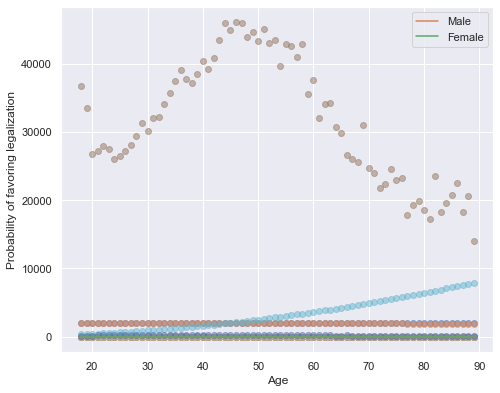

In [61]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped.mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()

plt.subplots_adjust(left=0, bottom=-0.2, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 12 - end

In [62]:
#vídeo

# Fim